In [19]:
# standart libraries
import pandas as pd
import numpy as np
import random
import datetime
import time

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
# load data
df_crypto = pd.read_csv("/Users/ina/Documents/spicedAcademy/crypto_price_prediction/data/final_data/crypto_only_related_data.csv")
df_metals = pd.read_csv("/Users/ina/Documents/spicedAcademy/crypto_price_prediction/data/final_data/metals_fed_data.csv")

def quick_overview(df, name):
    print(f"=== {name} ===")
    print("Rows:", len(df), "Columns:", df.shape[1])
    print("Date range:", df['date'].min(), "→", df['date'].max())
    print("Columns:", list(df.columns))
    print("Missing values:", df.isna().sum().sum())
    print()

quick_overview(df_crypto, "crypto data set")

quick_overview(df_metals, "Metalmetals & fed data")


print("\n crypto sample:")
display(df_crypto.head(3))

print("\n metals & FED sample:")
display(df_metals.head(3))

=== crypto data set ===
Rows: 208710 Columns: 73
Date range: 2014-01-01 00:00:00+00:00 → 2025-11-10 00:00:00+00:00
Columns: ['ticker', 'date', 'open', 'high', 'low', 'close', 'volume', 'volumenotional', 'tradesdone', 'basecurrency', 'quotecurrency', 'higher_close_today_vs_future_5_close', 'future_5_close_higher_than_today', 'higher_close_today_vs_future_10_close', 'future_10_close_higher_than_today', 'lower_close_today_vs_future_5_close', 'future_5_close_lower_than_today', 'lower_close_today_vs_future_10_close', 'future_10_close_lower_than_today', 'stock_ppo_2_vs_5', 'stock_ppo_2_vs_10', 'stock_ppo_2_vs_15', 'stock_ppo_2_vs_20', 'stock_ppo_2_vs_30', 'stock_ppo_5_vs_10', 'stock_ppo_5_vs_15', 'stock_ppo_5_vs_20', 'stock_ppo_5_vs_30', 'stock_ppo_10_vs_15', 'stock_ppo_10_vs_20', 'stock_ppo_10_vs_30', 'stock_ppo_15_vs_20', 'stock_ppo_15_vs_30', 'stock_ppo_20_vs_30', 'stock_rsi_2', 'stock_rsi_5', 'stock_rsi_10', 'stock_rsi_15', 'stock_rsi_20', 'stock_rsi_30', 'stock_atr_normalized_2', 'stock

,ticker,date,open,high,low,close,volume,volumenotional,tradesdone,basecurrency,...,stock_atr_channel_pos_10,stock_atr_channel_pos_15,stock_atr_channel_pos_20,stock_atr_channel_pos_30,stock_mfi_comparison_2,stock_mfi_comparison_5,stock_mfi_comparison_10,stock_mfi_comparison_15,stock_mfi_comparison_20,stock_mfi_comparison_30
0,btcusd,2014-01-01 00:00:00+00:00,736.51,739.00,709.00,732.00,7919.32,5.796942e+06,0.0,btc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,btcusd,2014-01-02 00:00:00+00:00,732.00,757.99,729.01,754.90,7907.64,5.969477e+06,0.0,btc,...,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN
2,btcusd,2014-01-03 00:00:00+00:00,751.88,798.70,742.50,784.19,15134.17,1.186806e+07,0.0,btc,...,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN



 metals & FED sample:


,date,dxy_investingdotcom,wti_price_investingdotcom,copper_price_investingdotcom_pound,usdxau,usdxag,bamlc0a0cm,bogmbase,bscicp03cnm665s,bscicp03usm665s,...,oil_to_gold_ratio,wm2ns_ppo_10_vs_20,wm2ns_ppo_10_vs_60,wm2ns_ppo_20_vs_60,copper_price_investingdotcom_pound_ppo_10_vs_20,copper_price_investingdotcom_pound_ppo_10_vs_60,copper_price_investingdotcom_pound_ppo_20_vs_60,wti_price_investingdotcom_ppo_10_vs_20,wti_price_investingdotcom_ppo_10_vs_60,wti_price_investingdotcom_ppo_20_vs_60
0,2001-01-01,NaN,NaN,NaN,NaN,NaN,NaN,598.7,99.71643,97.60673,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2001-01-02,NaN,NaN,NaN,NaN,NaN,2.04,598.7,99.71643,97.60673,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2001-01-03,NaN,NaN,NaN,NaN,NaN,2.02,598.7,99.71643,97.60673,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
print(f"crypto - general overview:")
display(df_crypto.info())

crypto - general overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208710 entries, 0 to 208709
Data columns (total 73 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   ticker                                 208710 non-null  object 
 1   date                                   208710 non-null  object 
 2   open                                   208710 non-null  float64
 3   high                                   208710 non-null  float64
 4   low                                    208710 non-null  float64
 5   close                                  208710 non-null  float64
 6   volume                                 208710 non-null  float64
 7   volumenotional                         208710 non-null  float64
 8   tradesdone                             208710 non-null  float64
 9   basecurrency                           208710 non-null  object 
 10  quotecurrency                

None

In [22]:
print(f"metals & fed - general overview:")
display(df_metals.info())

metals & fed - general overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9105 entries, 0 to 9104
Data columns (total 31 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   date                                             9105 non-null   object 
 1   dxy_investingdotcom                              5291 non-null   float64
 2   wti_price_investingdotcom                        5415 non-null   float64
 3   copper_price_investingdotcom_pound               5440 non-null   float64
 4   usdxau                                           5291 non-null   float64
 5   usdxag                                           5291 non-null   float64
 6   bamlc0a0cm                                       9104 non-null   float64
 7   bogmbase                                         9105 non-null   float64
 8   bscicp03cnm665s                                  9105 non-null   float64
 9

None

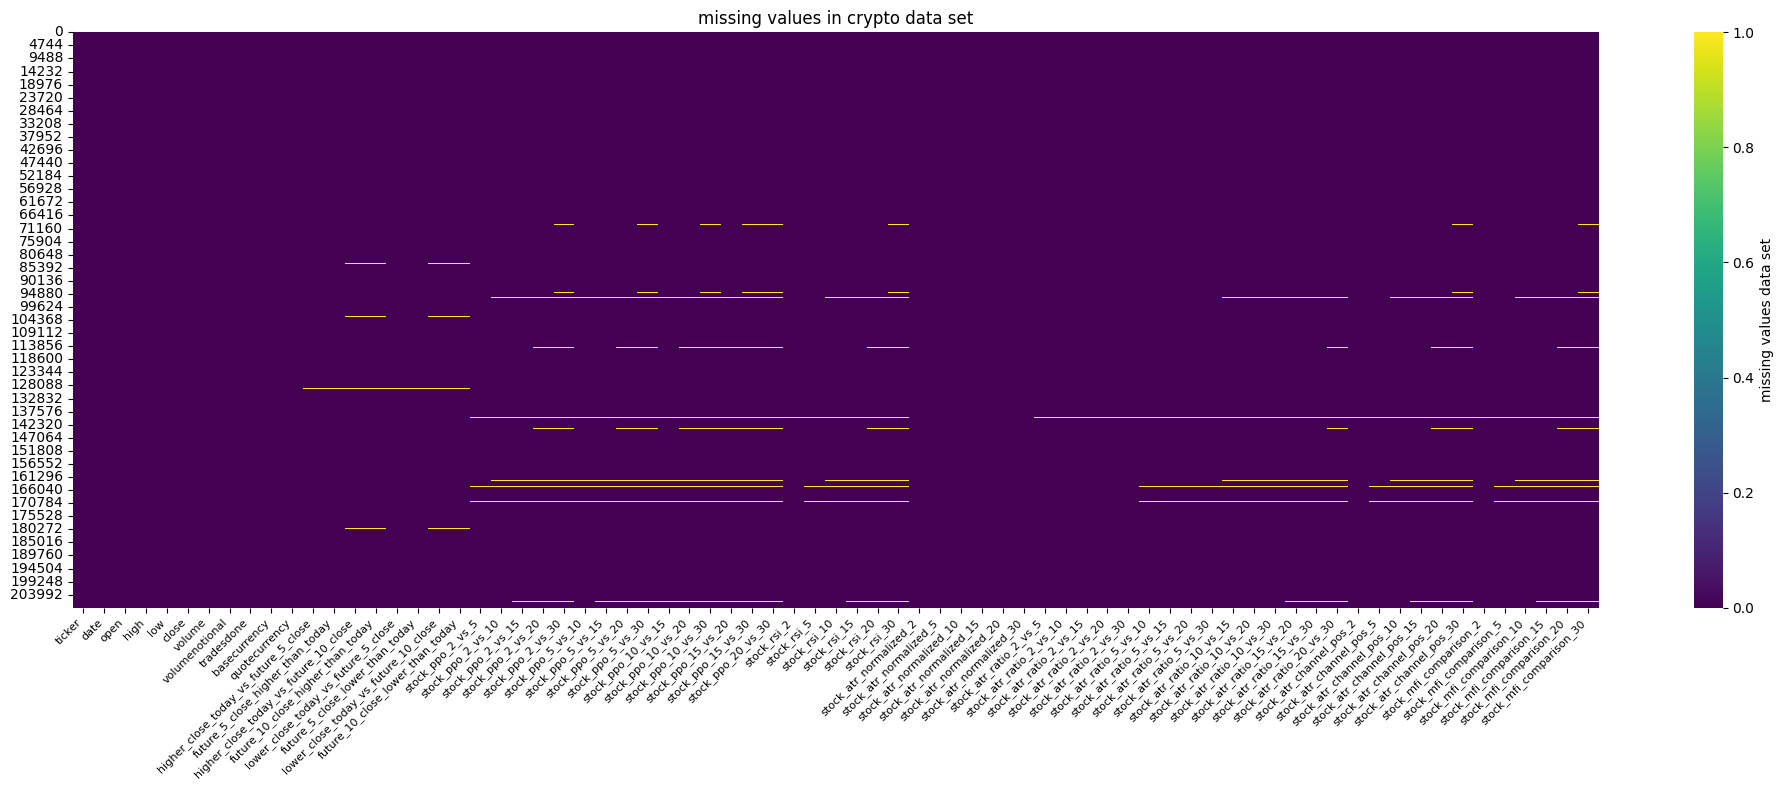

In [23]:
#check for missing values in df_crypto (visualized)
plt.figure(figsize=(20, 8))
sns.heatmap(df_crypto.isna(), cmap='viridis',
cbar_kws={'label': "missing values data set"})
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.title('missing values in crypto data set')
plt.tight_layout()
plt.show()


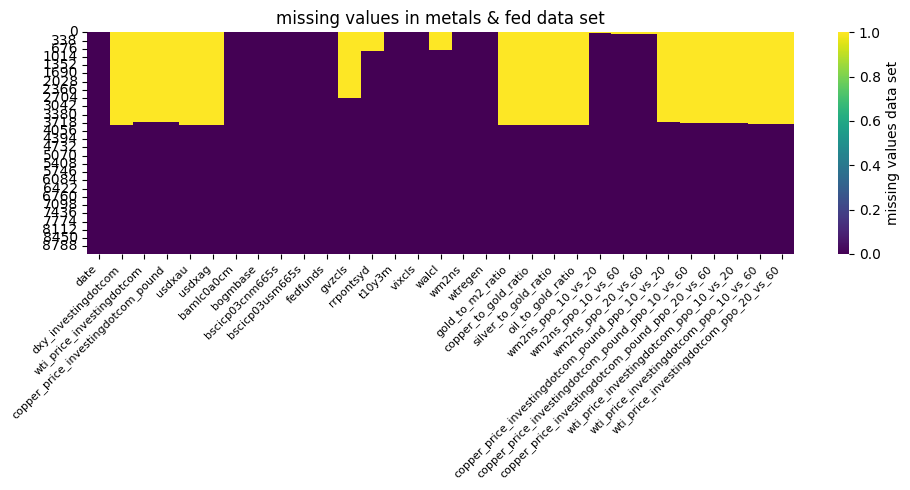

In [24]:
#check for missing values in df_metals (visualized)

plt.figure(figsize=(10, 5))
sns.heatmap(df_metals.isna(), cmap='viridis',
cbar_kws={'label': "missing values data set"})
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.title('missing values in metals & fed data set')
plt.tight_layout()
plt.show()

In [25]:
#unique ticker in crypto data set
ticker = df_crypto['ticker'].unique()
display(ticker)

array(['btcusd', 'ethusd', 'xrpusd', 'bnbusd', 'solusd', 'dogeusd',
       'trxusd', 'adausd', 'linkusd', 'bchusd', 'xlmusd', 'leousd',
       'suiusd', 'hbarusd', 'avaxusd', 'ltcusd', 'zecusd', 'xmrusd',
       'shibusd', 'tonusd', 'crousd', 'taousd', 'dotusd', 'mntusd',
       'uniusd', 'aaveusd', 'pepeusd', 'enausd', 'nearusd', 'etcusd',
       'memeusd', 'aptusd', 'ondousd', 'polusd', 'wldusd', 'icpusd',
       'arbusd', 'algousd', 'trumpusd', 'atomusd', 'kasusd', 'ipusd',
       'vetusd', 'jupusd', 'paxgusd', 'skyusd', 'flrusd', 'seiusd',
       'rndrusd', 'filusd', 'dashusd', 'bonkusd', 'virtualusd',
       'penguusd', 'xdcusd', 'imxusd', 'qntusd', 'aerousd', 'cakeusd',
       'spxusd', 'tiausd', 'opusd', 'injusd', 'ldousd', 'stxusd',
       'nexousd', 'morphousd', 'grtusd', 'crvusd', 'flokiusd', 'pythusd',
       'fetusd', 'xtzusd', 'iotausd', 'ethfiusd', 'ensusd', 'strkusd',
       'sandusd', 'twtusd', 'wifusd', 'zkusd', 'pendleusd', 'mplusd',
       'thetausd', 'jasmyusd', 'ga

In [26]:
df_crypto['date'] = pd.to_datetime(df_crypto['date'], format="ISO8601", utc=True)
df_metals['date'] = pd.to_datetime(df_metals['date'], format="ISO8601", utc=True)

print(f"crypto data set from: {df_crypto['date'].min()} to {df_crypto['date'].max()}")
print(f"metals &fed data set from: {df_metals['date'].min()} to {df_metals['date'].max()}")

crypto data set from: 2014-01-01 00:00:00+00:00 to 2025-11-10 00:00:00+00:00
metals &fed data set from: 2001-01-01 00:00:00+00:00 to 2025-11-10 00:00:00+00:00


In [27]:
# join the data sets
df_merged = df_crypto.merge(df_metals, how='left', on='date')
print(f"shape merged: {df_merged.shape}")

shape merged: (209200, 103)


In [28]:
# drop cols
columns_to_drop = [
    # from crypto ds: calculated indicators will be used
    'open', 'high', 'low', 'close', 'volume', 'volumenotional', 'tradesdone',
    'basecurrency', 'quotecurrency', 'dxy_investingdotcom',
    # from metals & fed ds:redundant/not relevant
    'wti_price_investingdotcom', 'copper_price_investingdotcom_pound',
    'usdxau', 'usdxag', 'bamlc0a0cm', 'bogmbase', 'bscicp03cnm665s',
    'bscicp03usm665s', 'fedfunds', 'gvzcls', 'rrpontsyd', 't10y3m',
    'vixcls', 'walcl', 'wm2ns', 'wtregen'
]

df_processed = df_merged.copy().drop(columns_to_drop, axis = "columns", errors="ignore")
df_processed.replace([np.inf, -np.inf], np.nan, inplace=True)
print(f"shape after columns dropped, inf's replaced: {df_processed.shape}")

#forward fill fo each ticker
from operator import concat
tickers = df_processed["ticker"].unique()
df_list = []

for ticker in tickers:
        df_ticker = df_processed[df_processed['ticker'] == ticker].copy()
        df_ticker = df_ticker.sort_values(['ticker', 'date']).ffill().dropna()
        df_list.append(df_ticker)

df_ffilled = pd.concat(df_list) 

print(f"any NaNs left? {df_ffilled.isna().sum().sum()}")
print(f"shape after NaNs ffiled: {df_ffilled.shape}") #can this be right? less rows after ffill?
print(f"date format: {df_ffilled['date'].dtype}")


shape after columns dropped, inf's replaced: (209200, 77)
any NaNs left? 0
shape after NaNs ffiled: (205075, 77)
date format: datetime64[ns, UTC]


In [29]:
# Find rows with MIN and MAX values (extreme outliers)
target_col = 'future_5_close_higher_than_today'

# Get min and max values
min_val = df_ffilled[target_col].min()
max_val = df_ffilled[target_col].max()

print(f"📊 Extreme Outliers - MIN and MAX values")
print("="*70)

# Show top 3 lowest and highest
print(f"\n🔻 Top 3 LOWEST values:")
display(df_ffilled.nsmallest(3, target_col)[['ticker', 'date', target_col]])

print(f"\n🔺 Top 3 HIGHEST values:")
display(df_ffilled.nlargest(3, target_col)[['ticker', 'date', target_col]])

# Find row(s) with MINIMUM value
print(f"\n🔻 MINIMUM value: {min_val:.2f}")
min_rows = df_ffilled[df_ffilled[target_col] == min_val]
print(f"Found {len(min_rows)} row(s) with this value:\n")
display(min_rows[['ticker', 'date', target_col]])

# Find row(s) with MAXIMUM value
print(f"\n🔺 MAXIMUM value: {max_val:.2f}")
max_rows = df_ffilled[df_ffilled[target_col] == max_val]
print(f"Found {len(max_rows)} row(s) with this value:\n")
display(max_rows[['ticker', 'date', target_col]])

📊 Extreme Outliers - MIN and MAX values

🔻 Top 3 LOWEST values:


,ticker,date,future_5_close_higher_than_today
67676,memeusd,2021-03-29 00:00:00+00:00,-99.999709
67678,memeusd,2021-03-31 00:00:00+00:00,-99.999705
67677,memeusd,2021-03-30 00:00:00+00:00,-99.999688



🔺 Top 3 HIGHEST values:


,ticker,date,future_5_close_higher_than_today
54989,dotusd,2019-01-12 00:00:00+00:00,3.151486e+06
54990,dotusd,2019-01-13 00:00:00+00:00,2.942033e+06
54988,dotusd,2019-01-06 00:00:00+00:00,2.766567e+06



🔻 MINIMUM value: -100.00
Found 1 row(s) with this value:



,ticker,date,future_5_close_higher_than_today
67676,memeusd,2021-03-29 00:00:00+00:00,-99.999709



🔺 MAXIMUM value: 3151486.33
Found 1 row(s) with this value:



,ticker,date,future_5_close_higher_than_today
54989,dotusd,2019-01-12 00:00:00+00:00,3.151486e+06


In [30]:
# Outlier removal via IQR, because capping creates artificial values at the caps
# since a price change in 3+ mio seems not real, also data point checked -> wrong data

lower_limit = df_ffilled.future_5_close_higher_than_today.quantile(0.01)  # 1st percentile
upper_limit = df_ffilled.future_5_close_higher_than_today.quantile(0.99)  # 99th percentile

df_outlier_removed = df_ffilled[(df_ffilled.future_5_close_higher_than_today>lower_limit)&(df_ffilled.future_5_close_higher_than_today<upper_limit)]

target_col = 'future_5_close_higher_than_today'

# Show top 3 lowest and highest
print(f"\n Top 3 LOWEST values:")
display(df_outlier_removed.nsmallest(3, target_col)[['ticker', 'date', target_col]])

print(f"\n Top 3 HIGHEST values:")
display(df_outlier_removed.nlargest(3, target_col)[['ticker', 'date', target_col]])

df_final = df_outlier_removed.copy()
print(f"fonal shape: {df_final.shape}")


 Top 3 LOWEST values:


,ticker,date,future_5_close_higher_than_today
66350,etcusd,2022-05-07 00:00:00+00:00,-29.571974
118282,xtzusd,2017-10-16 00:00:00+00:00,-29.567882
176095,xcnusd,2025-02-23 00:00:00+00:00,-29.563195



 Top 3 HIGHEST values:


,ticker,date,future_5_close_higher_than_today
137285,manausd,2018-04-17 00:00:00+00:00,49.922675
148666,jtousd,2024-03-29 00:00:00+00:00,49.921997
36284,hbarusd,2024-11-26 00:00:00+00:00,49.893776


fonal shape: (200973, 77)


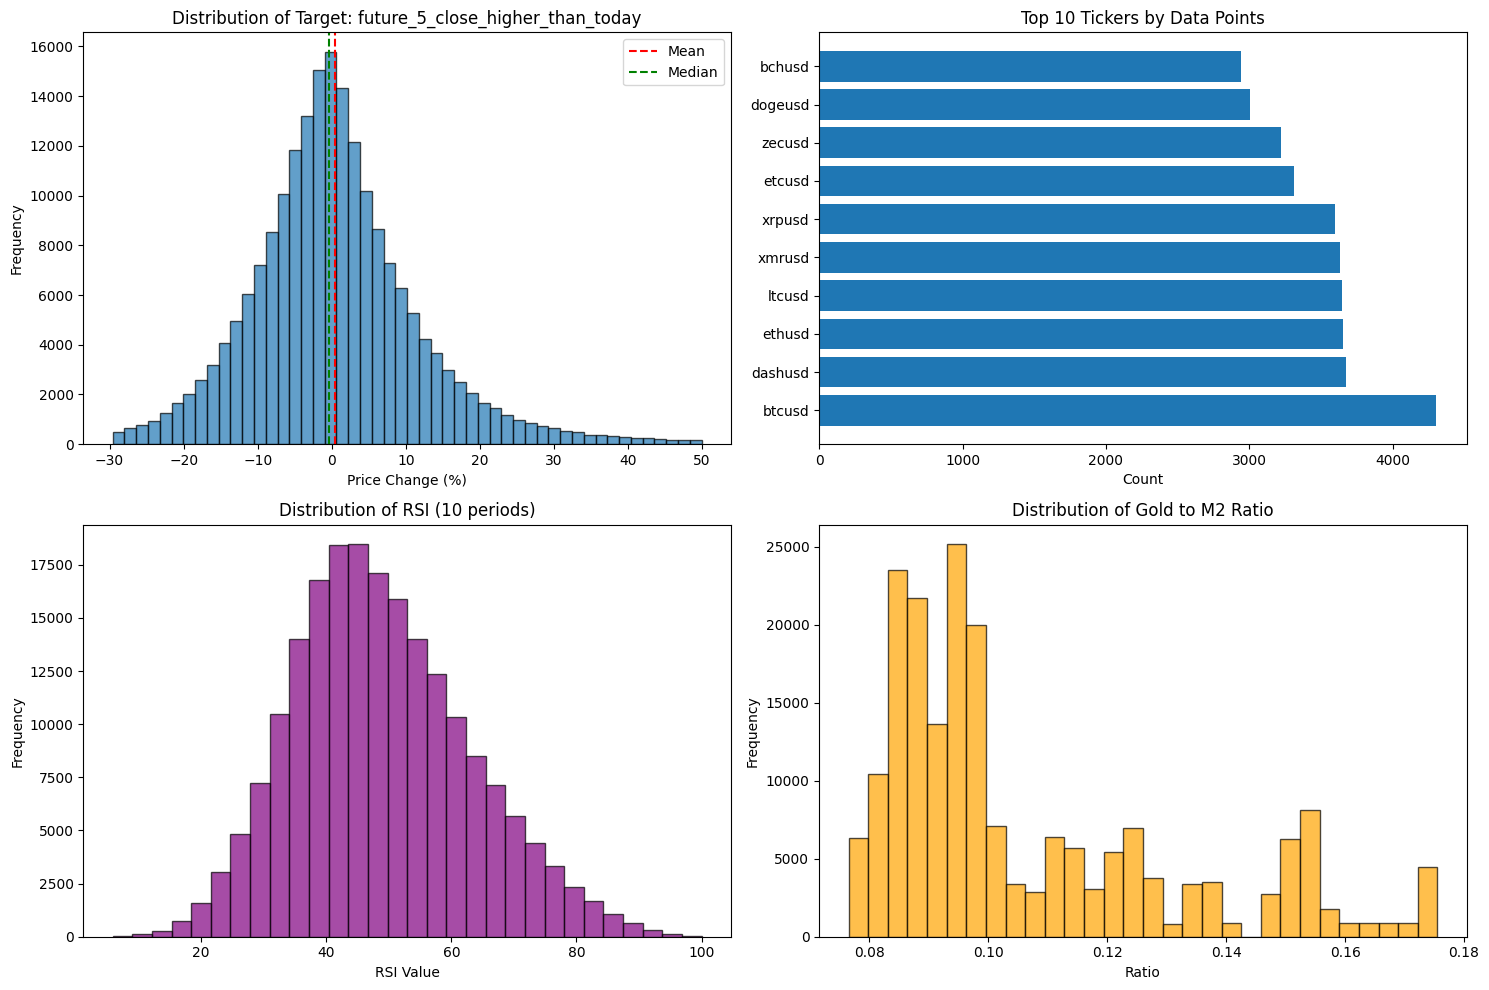


 df_final Summary Statistics
Total rows: 200,973
Total columns: 77
Date range: 2014-01-30 00:00:00+00:00 to 2025-11-10 00:00:00+00:00
Number of tickers: 142

Target variable stats:
count    200973.000000
mean          0.432558
std          11.378726
min         -29.571974
25%          -6.350112
50%          -0.347374
75%           6.083844
max          49.922675
Name: future_5_close_higher_than_today, dtype: float64


In [31]:
# visualization of df_final data distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Target variable distribution
axes[0, 0].hist(df_final['future_5_close_higher_than_today'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribution of Target: future_5_close_higher_than_today')
axes[0, 0].set_xlabel('Price Change (%)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df_final['future_5_close_higher_than_today'].mean(), color='red', linestyle='--', label='Mean')
axes[0, 0].axvline(df_final['future_5_close_higher_than_today'].median(), color='green', linestyle='--', label='Median')
axes[0, 0].legend()

# 2. Ticker distribution
ticker_counts = df_final['ticker'].value_counts().head(10)
axes[0, 1].barh(ticker_counts.index, ticker_counts.values)
axes[0, 1].set_title('Top 10 Tickers by Data Points')
axes[0, 1].set_xlabel('Count')

# 3. Key technical indicators distribution (RSI example)
axes[1, 0].hist(df_final['stock_rsi_10'], bins=30, edgecolor='black', alpha=0.7, color='purple')
axes[1, 0].set_title('Distribution of RSI (10 periods)')
axes[1, 0].set_xlabel('RSI Value')
axes[1, 0].set_ylabel('Frequency')

# 4. Gold to M2 ratio distribution
axes[1, 1].hist(df_final['gold_to_m2_ratio'], bins=30, edgecolor='black', alpha=0.7, color='orange')
axes[1, 1].set_title('Distribution of Gold to M2 Ratio')
axes[1, 1].set_xlabel('Ratio')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*70)
print(" df_final Summary Statistics")
print("="*70)
print(f"Total rows: {len(df_final):,}")
print(f"Total columns: {df_final.shape[1]}")
print(f"Date range: {df_final['date'].min()} to {df_final['date'].max()}")
print(f"Number of tickers: {df_final['ticker'].nunique()}")
print(f"\nTarget variable stats:")
print(df_final['future_5_close_higher_than_today'].describe())

In [32]:
#df_final.to_csv("/Users/ina/Documents/spicedAcademy/time_series_project/data/final_data/20251115_dataset_crp.csv")